# Crank Nicolson 

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg
def solu_eq_calor_CN(alpha,t0,a,b,nt,nx,dt,f):
    # alpha: constante de calor
    # t0: tiempo inicial
    # a: extremo izquierdo
    # b: extremo derecho
    # nt: número de muestras en t
    # nx: número de muestras en x
    # dt: tamaño de muestra en tiempo
    # f: condicion inicial
    L=float(b-a)
    dx=L/(nx-1)
    beta=0.5*alpha*dt/dx**2
    tmax=nt*dt
    t=np.arange(t0,tmax,dt)
    #inicialice el vector w
    w=np.zeros((nx,nt))
    X = np.linspace(a,b,nx)
    print("dimensiones de w", w.shape)
    # condiciones de frontera (Dirichlet homogéneas)
    for j in range(nt):
        w[0,j]=0
        w[nx-1,j]=0
    # vector de la derecha y solución interna
    rhs = np.zeros(nx-2)
    # elaboración de matriz A
    # Matrices A, B inicialización, lado derecho y lleno
    A= np.zeros([nx-2,nx-2])
    B= np.zeros([nx-2,nx-2])
    b= np.zeros(nx-2)
    # condición inicial
    w[:,0]=np.asarray([f(xx) for xx in X])
    # lleno de matrices A y B
    for i in range(nx-2):
        A[i][i] = 1.0 + 2. * beta
        B[i][i] = 1.0 - 2. * beta
        if i> 0 :
            A[i][i-1] = -beta
            B[i][i-1] = beta
        if i<nx-3:
            A[i][i+1] = -beta*1.0
            B[i][i+1] = beta
    b[0]=beta*(w[0,1]+w[0,0])
    b[nx-3]=beta*(w[nx-1,1]+w[nx-1,0])
    print("beta=",beta)
    # vector del lado derecho
    rhs = B.dot(w[1:-1,0]) + b
    # ciclo sobre tiempos
    for j in range(0,nt-1):
        # resuelva Aw_j+1=w_j
        x = np.linalg.solve(A, rhs)
        # vector del lado derecho
        rhs = B.dot(x) + b
        # rotación
        for i in range(nx-2):
            w[i+1, j + 1] = x[i]
        b[0]=beta*(w[0,j+1]+w[0,j])
        b[nx-3]=beta*(w[nx-1,j]+w[nx-1,j+1])
    return w

In [15]:
alpha=1
a=0
b=1
nt=40001
# nt=5
nx=101
dt=0.00001
# dt=0.1
t0=0
x0=0
L=b-a
# definición de la condición inicial
def f(x):
    return 6*np.sin(np.pi*x/L)
w=solu_eq_calor_CN(alpha,t0,a,b,nt,nx,dt,f)

('dimensiones de w', (101, 40001))
('beta=', 0.05)


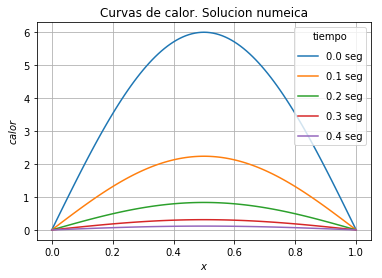

In [16]:
#grafique las columnas de w
params={'legend.fontsize':5,'legend.handlength':1}
Ndt=10000
# Ndt=1
plt.xlabel(r"$x$")
plt.ylabel(r'$calor$')
plt.title(r'Curvas de calor. Solucion numeica')
X = np.linspace(a,b,w.shape[0])
for j in range(0,nt,Ndt):
    t=j*dt
    plt.plot(X,w[:,j], label=str(round(t,1)) + ' seg')
    plt.legend(labelspacing=1, title="tiempo")
plt.grid(True)
plt.show()

# Error con respecto a la solución analítica

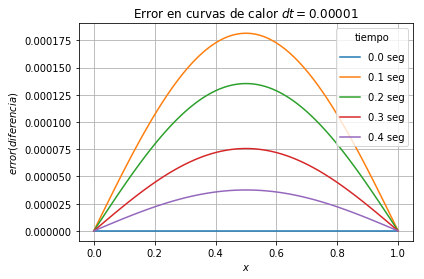

In [17]:
def u(x,t):
    return 6*np.sin(np.pi*x/L)*np.exp(-(1.0/alpha)*(np.pi/L)**2*t)
#inicialice el vector w
nt=40001
dt=0.00001
Nt=int(nt/10000)+1

dx=(b-a)/(nx-1.)
error =np.zeros((nx,Nt))
k=0
for j in range(0,nt,10000):
    t=j*dt
    for i in range(nx):
        x=i*dx
        error[i,k]=w[i,j]-u(x,t)
    k += 1
# grafique el error
params={'legend.fontsize':5,'legend.handlength':1}
plt.xlabel(r"$x$")
plt.ylabel(r'$error (diferencia)$')
plt.title(r'Error en curvas de calor $dt=0.00001$')
X = np.linspace(0,L,w.shape[0])
Dt=0.1
for j in range(0,Nt):
    t=j*Dt
    plt.plot(X,error[:,j], label=str(round(t,1)) + ' seg')
    plt.legend(labelspacing=1, title="tiempo")
# Do the plot code
plt.grid(True)
plt.show()

# Revisamos lo que pasa para dt = 0.1

('dimensiones de w', (101, 5))
('beta=', 500.0)


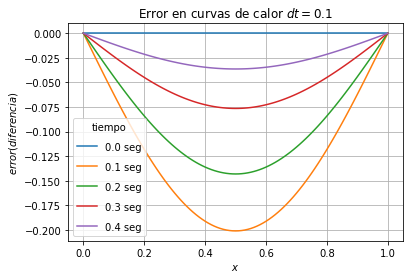

In [19]:
#inicialice el vector w

nt=5
dt=0.1
dx=(b-a)/(nx-1.)
w=solu_eq_calor_CN(alpha,t0,a,b,nt,nx,dt,f)
error =np.zeros((nx,nt))
k=0
for j in range(nt):
    t=j*dt
    for i in range(nx):
        x=i*dx
        error[i,k]=w[i,j]-u(x,t)
    k += 1
# grafique el error
params={'legend.fontsize':5,'legend.handlength':1}
plt.xlabel(r"$x$")
plt.ylabel(r'$error (diferencia)$')
plt.title(r'Error en curvas de calor $dt=0.1$')
X = np.linspace(0,L,w.shape[0])
for j in range(0,Nt):
    t=j*dt
    plt.plot(X,error[:,j], label=str(round(t,1)) + ' seg')
    plt.legend(labelspacing=1, title="tiempo")
# Do the plot code
plt.grid(True)
plt.show()